 #Results and Auxiliary Questions

In [110]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D
import IPython.html.widgets as widg
from IPython.html.widgets import fixed
import IPython as ipynb
import scipy.stats as sts
%matplotlib inline

We begin with the base class that does all the work:

In [111]:
class Network:
    def __init__(self, shape):
        """The base network class. This defines a simple feed-forward network with appropriate weights and biases.
        
        Arguments:
        shape (list-like): This defines the # of layers and # of neurons per layer in your network.
                           Each element of the array or list adds a new layer with the number neurons specified by the element.
        Variables:
        self.shape: see shape.
        self.weights: A list of numpy arrays containing the weights corresponding to each channel between neurons.
        self.biases: A list of numpy arrays containing the biases corresponding to each neuron.
        self.errors: A list of numpy arrays containing the error of each neurons in any iteration of the training process.
        self.eta: A float representing the learning rate.
        self.lam: A scale factor used in L2 regularization
        """
        
        self.shape = np.array(shape)
        self.weights = [np.random.ranf((self.shape[i],self.shape[i-1]))*.1 for i in range(1,len(self.shape))]
        self.biases = [np.random.ranf((self.shape[i],))*.1 for i in range(1,len(self.shape))]
        self.errors = [np.random.ranf((self.shape[i],)) for i in range(1,len(self.shape))]
        self.eta = .2
        self.lam = .01
    def sigmoid(self, inputs):
        """Computes the sigmoid function of some input.
        
        Arguments:
        inputs (float or numpy array): The input or inputs to be fed through the sigmoid function.
        """
        
        return 1/(1+np.exp(-inputs))
    def feedforward(self, inputs):
        """Feeds inputs through the network and returns the output.
        
        Arguments:
        inputs (numpy array): The inputs to the network, must be the same size as the first(input) layer.
        
        Variables:
        self.activation: A list of numpy arrays corresponding to the output of each neuron in your network.
        """
        
        assert inputs.shape==self.shape[0] #inputs must feed directly into the first layer.
        self.activation = [np.zeros((self.shape[i],)) for i in range(len(self.shape))]
        self.activation[0] = inputs
        for i in range(1,len(self.shape)):
            self.activation[i]=self.sigmoid(np.dot(self.weights[i-1],self.activation[i-1])+self.biases[i-1])
        return self.activation[-1]
    def comp_error(self, answer):
        """Computes the errors of each neuron.(Typically called Back Propagation)
        
        Arguments:
        answers (numpy array): The expected output from the network, must be the same size as the last(output) layer.
        """
        
        assert answer.shape==self.activation[-1].shape
        self.errors[-1] = (self.activation[-1]-answer)*np.exp(np.dot(self.weights[-1],self.activation[-2])+self.biases[-1])/(np.exp(np.dot(self.weights[-1],self.activation[-2])+self.biases[-1])+1)**2
        for i in range(len(self.shape)-2, 0, -1):
            self.errors[i-1] = self.weights[i].transpose().dot(self.errors[i])*np.exp(np.dot(self.weights[i-1],self.activation[i-1])+self.biases[i-1])/(np.exp(np.dot(self.weights[i-1],self.activation[i-1])+self.biases[i-1])+1)**2
    def grad_descent(self):
        """Changes each variable based on the gradient descent algorithm."""
        
        for i in range(len(self.biases)):
            self.biases[i]=self.biases[i]-self.eta*self.errors[i]
        for i in range(len(self.weights)):
            for j in range(self.weights[i].shape[0]):
                for k in range(self.weights[i].shape[1]):
                    self.weights[i][j,k] = (1-self.eta*self.lam/1000)*self.weights[i][j,k] - self.eta*self.activation[i][k]*self.errors[i][j]
    def train(self, inputs, answer):
        """Trains the network.
        
        Arguments:
        inputs (numpy array): The inputs to the network, must be the same size as the first(input) layer.
        answers (numpy array): The expected output from the network, must be the same size as the last(output) layer.
        """
        
        self.feedforward(inputs)
        self.comp_error(answer)
        self.grad_descent()

 Once I got the base class working, it was time to play.
 
 What I have so far is the following.

In [112]:
acc1 = np.loadtxt("Accuracy_Data_run_1.dat")
acc2 = np.loadtxt("Accuracy_Data_run_2.dat")
acc3 = np.loadtxt("Accuracy_Data_run_3.dat")
acc4 = np.loadtxt("Accuracy_Data_run_4.dat")
acc5 = np.loadtxt("Accuracy_Data_run_5.dat")
acc6 = np.loadtxt("Accuracy_Data_run_8.dat")
acc7 = np.loadtxt("Accuracy_Data_run_9.dat")
acc8 = np.loadtxt("Accuracy_Data_run_10.dat")
acc9 = np.loadtxt("Accuracy_Data_run_11.dat")
acc10 = np.load("Accuracy_Data_run_15.npy")
acc11 = np.load("Accuracy_Data_run_16.npy")
acc12 = np.loadtxt("Accuracy_Data_run_17.dat")
def plot_epochs(az_angle, eleva, acc, l_lim1, l_lim2):
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(np.linspace(0,acc.shape[1],acc.shape[1]), np.linspace(l_lim1,l_lim2, l_lim2-l_lim1))
    ax.plot_surface(X, Y, acc)
    plt.xlabel("Training Epoch")
    plt.ylabel("# of Hidden Nodes")
    ax.set_zlabel("Accuracy")
    plt.title("Accuracy as a Function of # of Hidden Nodes and Training Epochs")
    ax.view_init(elev=eleva, azim=az_angle);

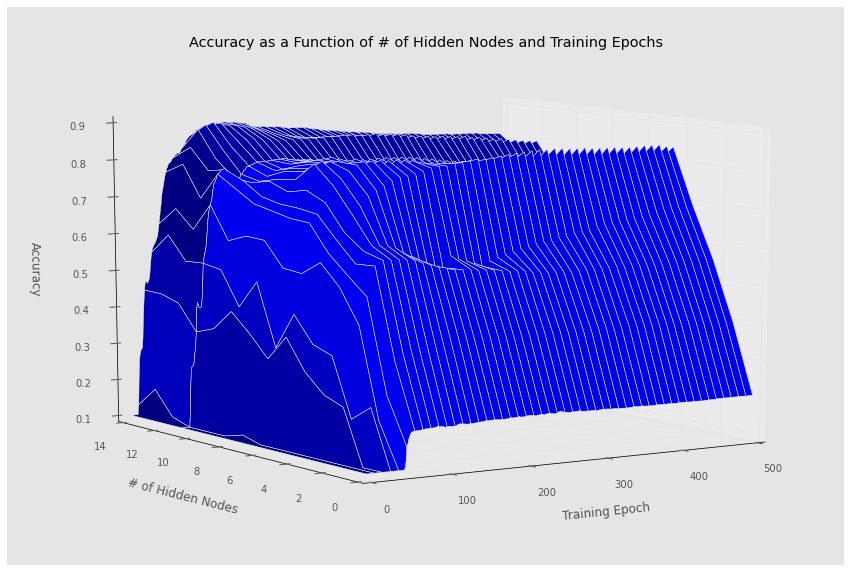

In [113]:
widg.interact(plot_epochs, az_angle=(0, 360, 1), eleva=(0,20,1), acc=fixed(acc1), l_lim1=fixed(0), l_lim2=fixed(14));

This is a graph of accuracy as a function of # of hidden nodes and training epochs before I added L2 regularization. This is with 1000 training samples per epoch. 

###Key Features:
-Every run except those with less than 3 hidden nodes quickly jumps to anywhere between 70% and 90% accuracy within about 100 training epochs.

-Directly following around the 150 epoch mark, accuracy begins to decline.

-From 4 to 14 hidden nodes we see an upward trend in accuracy.

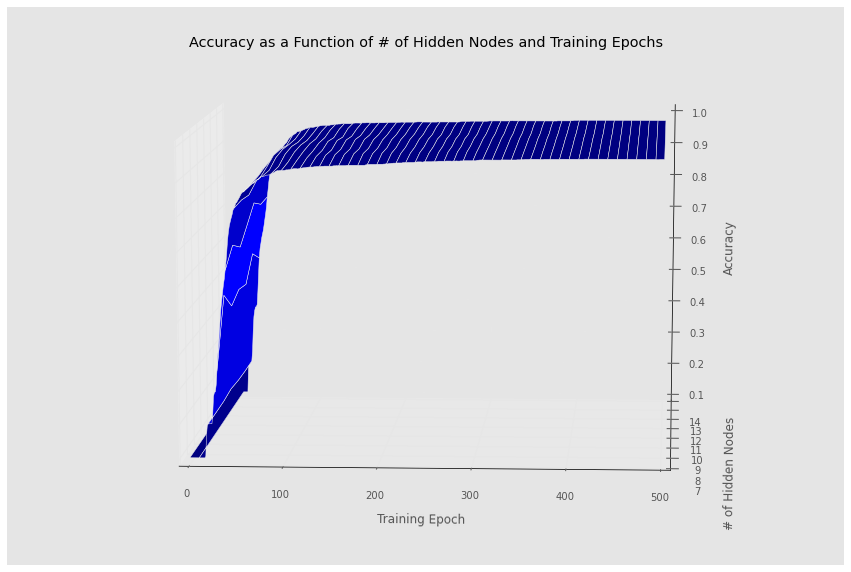

In [114]:
widg.interact(plot_epochs, az_angle=(0, 360, 1), eleva=(0,20,1), acc=fixed(acc2), l_lim1=fixed(7), l_lim2=fixed(14));

This is a graph of accuracy as a function of # of hidden nodes and training epochs after I added L2 regularization. This is with 1000 training samples per epoch. 

###Key Features:
-Every run quickly jumps to above 90% accuracy within about 100 training epochs.

-Directly following around the 150 epoch mark, accuracy no longer begins to decline. This is the L2 in action!

-If you look very closely or plot only the values above 90% accuracy, there is still a slight trend upward from 7 to 14 hidden nodes.

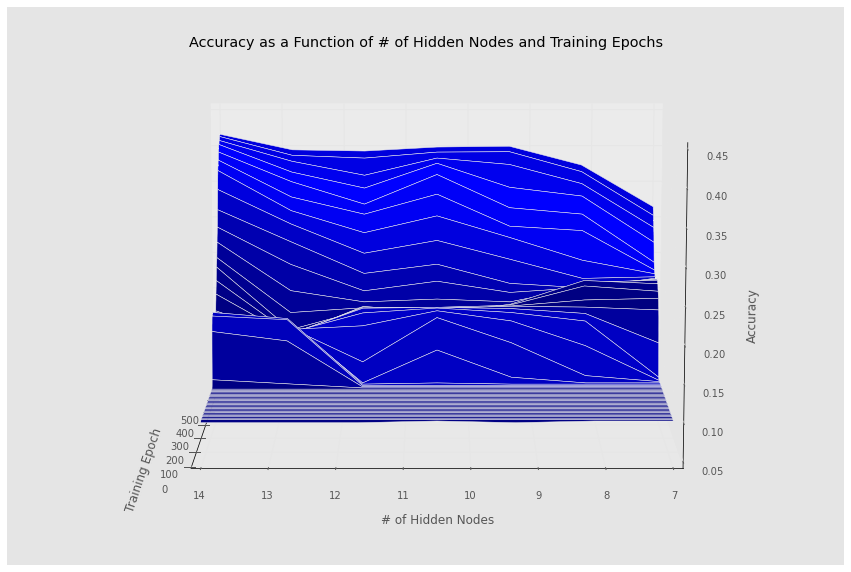

In [115]:
widg.interact(plot_epochs, az_angle=(0, 360, 1), eleva=(0,20,1), acc=fixed(acc3), l_lim1=fixed(7), l_lim2=fixed(14));

This is a graph of accuracy as a function of # of hidden nodes and training epochs after I added L2 regularization. This is with 50 training samples per epoch. 

###Key Features:
-Every run stays at around 10% accuracy(random guesses) until about 270 epochs.

-At about the 270 mark, the runs with a higher # of hidden nodes lead the pack with increasing accuracy. The others follow in a similar fashion.

-None of the runs make it past 45% accuracy in 500 epochs.

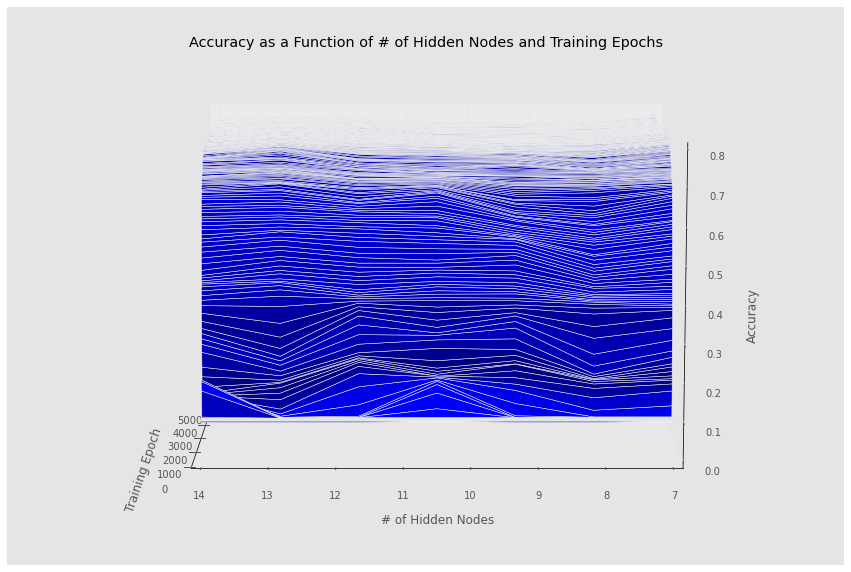

In [116]:
widg.interact(plot_epochs, az_angle=(0, 360, 1), eleva=(0,20,1), acc=fixed(acc4), l_lim1=fixed(7), l_lim2=fixed(14));

This is a graph of accuracy as a function of # of hidden nodes and training epochs after I added L2 regularization. This is with 50 training samples per epoch. 

###Key Features:
-From 0 to 500, the graph exactly replicates the previous one.

-It takes around 1000 training epochs to reach maximum accuracy.

-None of the runs make it past 80% accuracy.

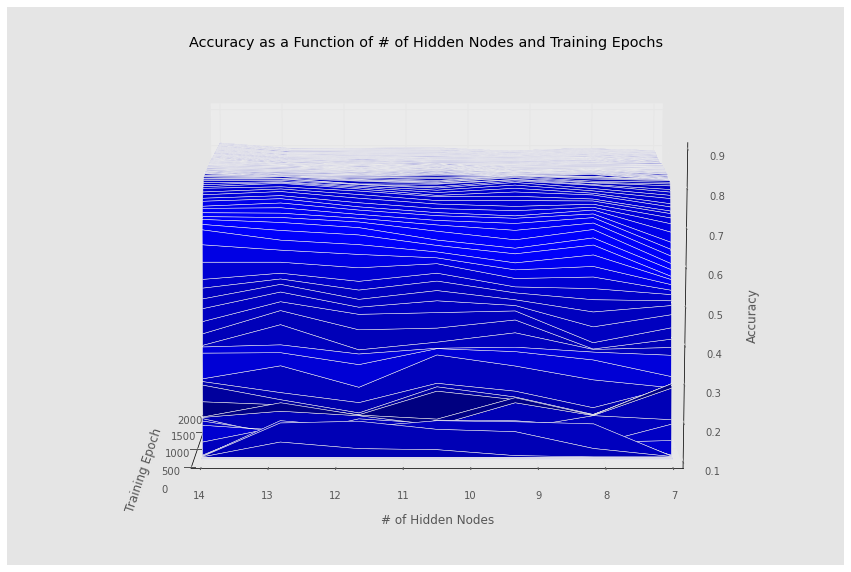

In [117]:
widg.interact(plot_epochs, az_angle=(0, 360, 1), eleva=(0,20,1), acc=fixed(acc5), l_lim1=fixed(7), l_lim2=fixed(14));

This is a graph of accuracy as a function of # of hidden nodes and training epochs after I added L2 regularization. This is with 100 training samples per epoch. 

###Key Features:
-At around 500 epochs every run reaches a max accuracy.

-From 7 to 14 hidden nodes we see a rise from just below 80% to just above 80%.

-None of the runs make it past 82% accuracy.

##A New Cost Function

###Motivation

While the quadratic cost function does the job, it suffers from something called "learning slowdown" at extremes. This is seen clearly in the above graphs. Accuracy flatlines for many epochs before doing anything at all and at high accuracies moves very slowly. To combat this, we introduce the square tangent cost function:

$$tan^2(y-a)$$

Where here, $y$ represents the final result of a feedforward, and $a$ represents the correct output.

This function approaches infinity as $(y-a)$ approaches 1. Because we use the sigmoid function to determine our outputs, $(y-a)$ should never exceed 1.

In experimenting with this function, however, I have found that if my learning rate is too high, I will be thrown outside of $[-1,1]$ and recieve errors, to combat this, I employ a dynamic learning rate that will be outlined below.

###Requirements of a Cost Function

####Everywhere Positive

It is well know that any squared, real-valued function is positive.

####Ouput Near Zero for Correct Answer

We plainly see that $\lim_{y\to\ a} (y-a)=0$ and it is well known that $tan^2(0)=0$.

####Small Change in Weight or Bias Results in Small Change in Function

Take my word for it, the derivation is lengthy and messy.

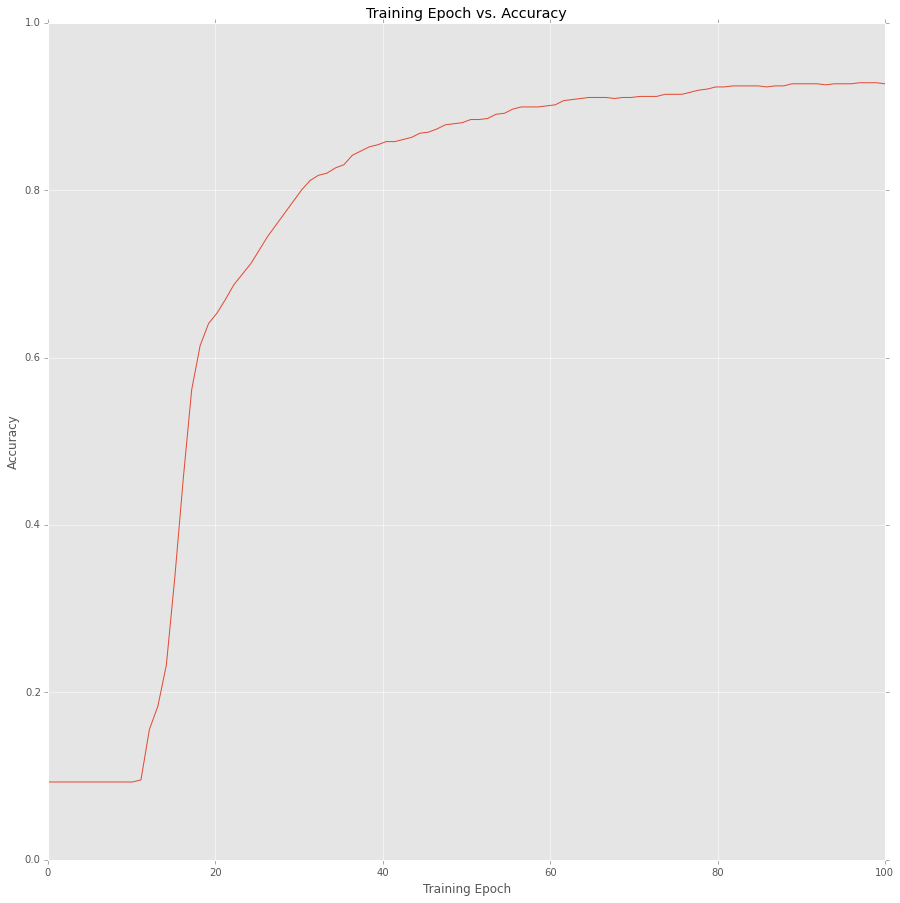

In [118]:
plt.figure(figsize=(15,15))
plt.plot(np.linspace(0, len(acc6), len(acc6)),acc6);
plt.title("Training Epoch vs. Accuracy")
plt.xlabel("Training Epoch")
plt.ylabel("Accuracy");

This is a graph of accuracy as a function of training epochs after I changed to the square tangent cost function. This is with 1000 training samples per epoch. 

###Key Features:
-At around 30 epochs we reach about 80% accuracy.

-We notice a slowdown towards the end of our training session.

-We still see initial stalling, however its duration is much less than that of the quadratic counterpart.

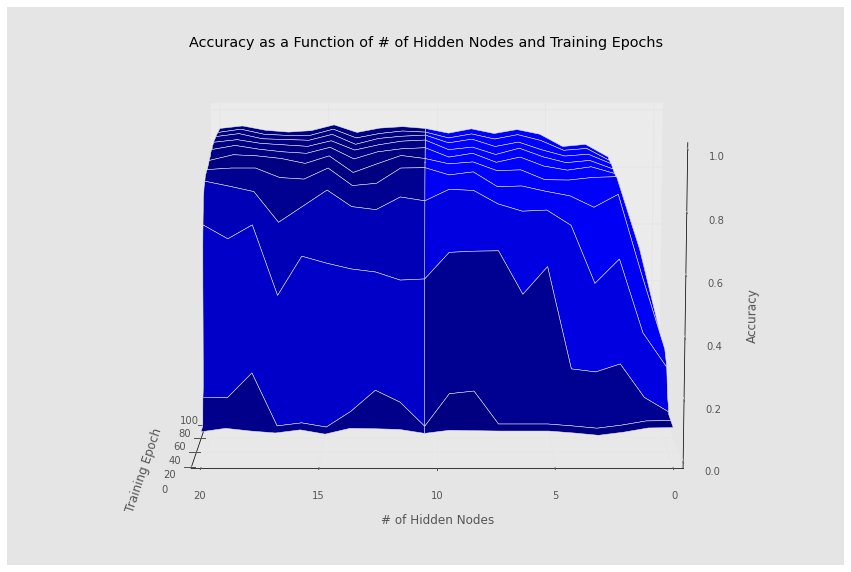

In [119]:
widg.interact(plot_epochs, az_angle=(0, 360, 1), eleva=(0,20,1), acc=fixed(acc7), l_lim1=fixed(0), l_lim2=fixed(20));

This is a graph of accuracy as a function of # of hidden nodes and training epochs after I changed to the square tangent cost function. This is with 1000 training samples per epoch. 

###Key Features:
-At around 25 epochs every run reaches at least 80% accuracy.

-We notice an appreciable trend in the location of the beginning of leveling off as a function of the # of hidden nodes.

-We still see initial stalling, however its duration is much less than that of the quadratic counterpart.

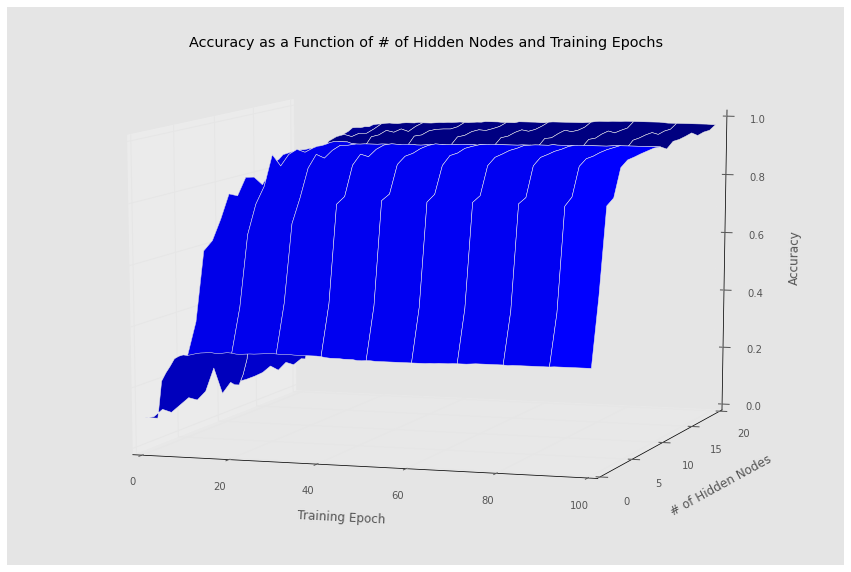

In [120]:
widg.interact(plot_epochs, az_angle=(0, 360, 1), eleva=(0,20,1), acc=fixed(acc8), l_lim1=fixed(0), l_lim2=fixed(20));

This is a graph of accuracy as a function of # of hidden nodes and training epochs after I added a dynamic learning constant. This is with 1000 training samples per epoch. 

###Key Features:
-At around 7 epochs every run reaches at least 90% accuracy.

-We notice a much smoother leveling off towards the final epochs.

-We no longer see initial stalling for more than 2-3 epochs.

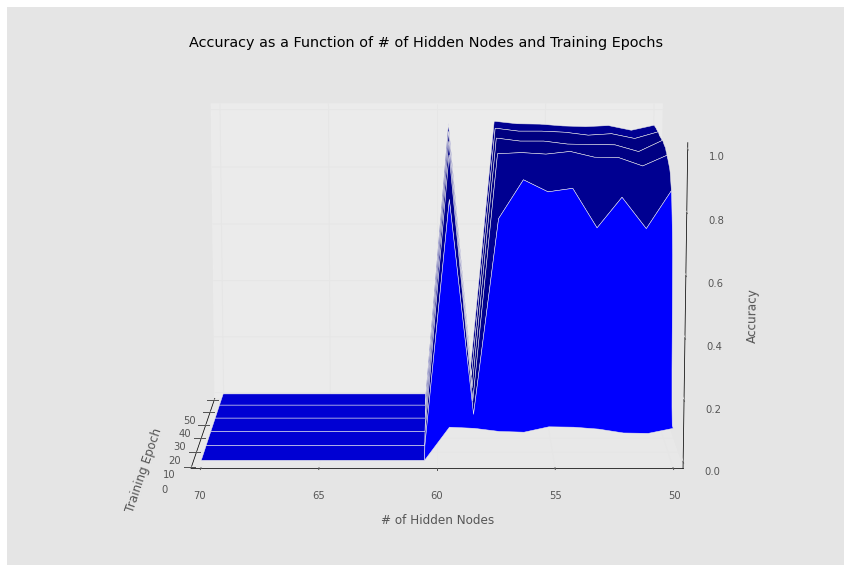

In [121]:
widg.interact(plot_epochs, az_angle=(0, 360, 1), eleva=(0,20,1), acc=fixed(acc9), l_lim1=fixed(50), l_lim2=fixed(70));

This is a graph of accuracy as a function of # of hidden nodes and training epochs after I bumped up the number of hidden nodes. This is with 1000 training samples per epoch. 

###Key Features:
-We see no appreciable difference in max accuracy between a large or small # of hidden nodes.

-Similarly, we see no appreciable difference in location of the beginning of leveling off.

-The only difference between the # of hidden nodes seems to be runtime.

##Weight Scattering

To find the best network right off the bat, we want the one with the best initial weights. To do this we just initialize N number of networks and train them once or twice to find the one with the best initial accuracies.

In parameter space, we are essentially scattering networks everywhere. This method allows us to start in the most favorable location. For example, we may happen to throw a network near a minimum in parameter space, giving us a greater accuracy right off the bat.

I have found that for relatively low N, weight scattering yields excellent results. We achieve higher accuracies faster.

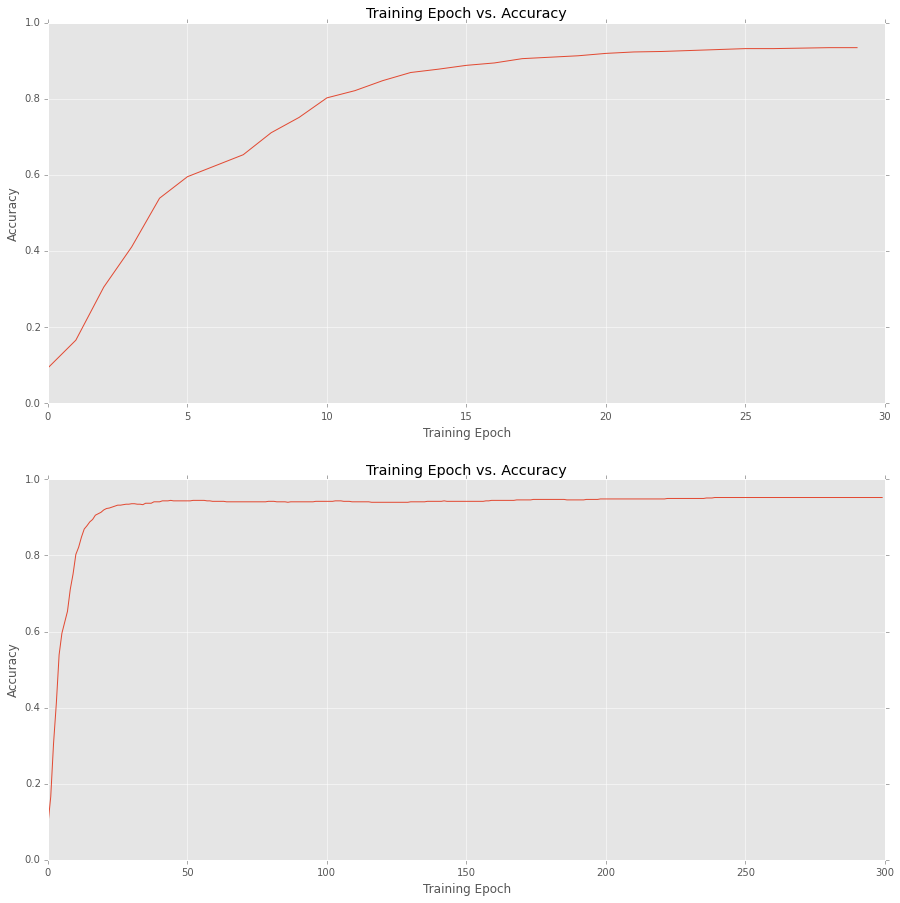

In [122]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
plt.plot(acc11[:30])
plt.title("Training Epoch vs. Accuracy")
plt.xlabel("Training Epoch")
plt.ylabel("Accuracy")
plt.subplot(2,1,2)
plt.plot(acc11);
plt.title("Training Epoch vs. Accuracy")
plt.xlabel("Training Epoch")
plt.ylabel("Accuracy")

This is a graph of accuracy as a function of training epochs after I added weight scattering. This is with 1000 training samples per epoch. 

###Key Features:
-We see no initial stalling.

-We reach 80% accuracy in 10 epochs.

-We see subtle rises in accuracy until the very end.

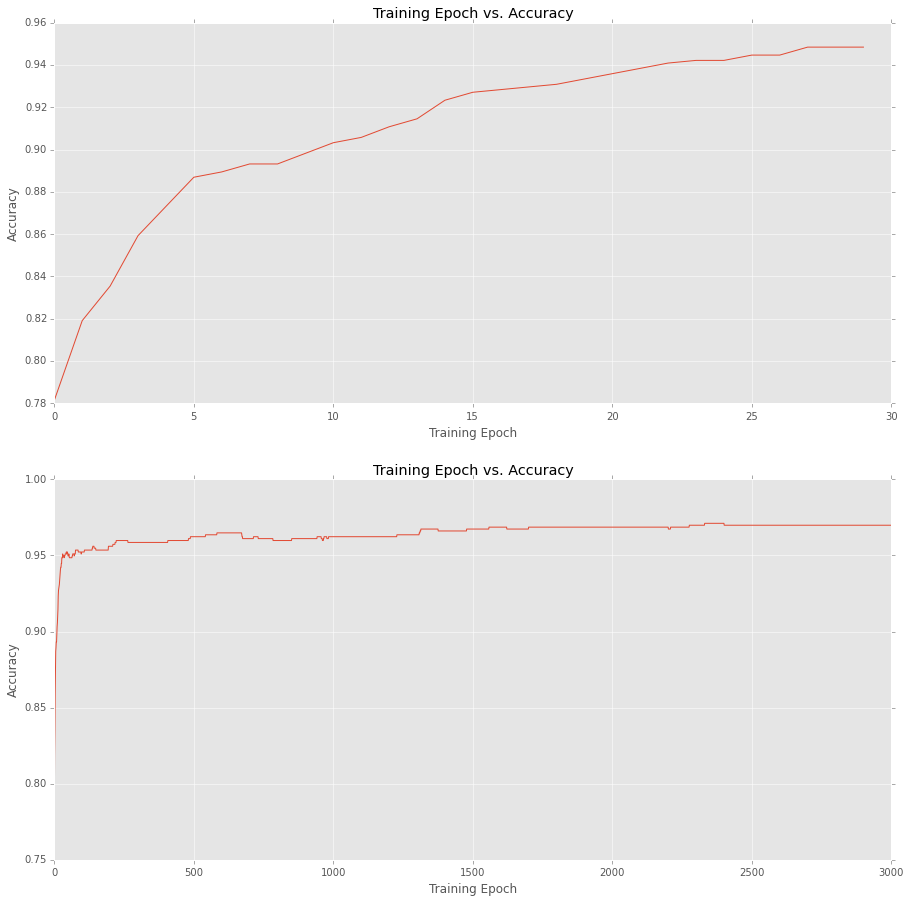

In [123]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
plt.plot(acc10[:30])
plt.title("Training Epoch vs. Accuracy")
plt.xlabel("Training Epoch")
plt.ylabel("Accuracy")
plt.subplot(2,1,2)
plt.plot(acc10);
plt.title("Training Epoch vs. Accuracy")
plt.xlabel("Training Epoch")
plt.ylabel("Accuracy");

This is a graph of accuracy as a function of training epochs after I added weight scattering. This is with 1000 training samples per epoch. 

###Key Features:
-This shows the subtle rise in accuracy over 3000 epochs.

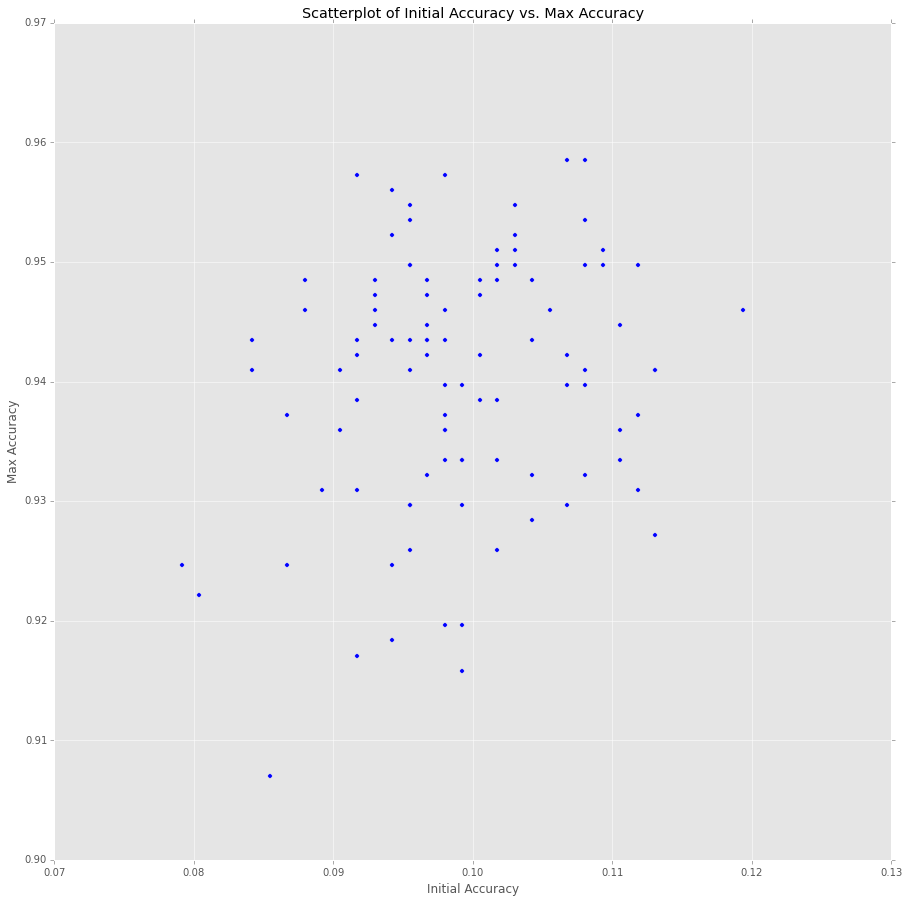

In [124]:
plt.figure(figsize=(15,15))
plt.scatter(acc12[:,0], acc12[:,1]);
plt.title("Scatterplot of Initial Accuracy vs. Max Accuracy")
plt.xlabel("Initial Accuracy")
plt.ylabel("Max Accuracy");

In [125]:
print(sts.mstats.normaltest(acc12[:,0]),sts.mstats.normaltest(acc12[:,1]))
sts.pearsonr(acc12[:,0], acc12[:,1])

((0.0075995457262671151, 0.99620743713875803), (5.7055548972934353, 0.057683884149624019))


(0.2167868619167424, 0.030277070206115406)

#####Normality
According to the SciPy Normality test, I can say with 95% confidence that each of these variables is normally distributed.

#####Correlation
According to the Pearson Correlation test, I can say with 95% confidence that these variables are correlated with a correlation coefficient of 0.2167.

Because these two variables are correlated, I use initial accuracy as my predictor.